# Lab 3 Vision par ordinateur : Apprentissage profond

Author: Mohsen Benlazreg M.ing en GPA

Mise à jour: Étienne Pepin

REF : https://keras.io/examples/
#### requirements :
numpy  
sklearn  
tensorflow

# Partie 1 : Introduction au réseau de neurones

Dans cette partie nous commencerons par un premier exemple concret d'un réseau de neurones, qui utilise la bibliothèque Keras pour apprendre à classifier les chiffres manuscrits. Le problème que nous essayons de résoudre ici est de classer les images en niveaux de gris de chiffres manuscrits (28 pixels par 28 pixels), dans leur 10 catégories (0 à 9).
La base de bonnées que nous utiliserons est MNIST, elle est trés populaire dans la communauté d'apprentissage profond et contient 60 000 images d'entraînement, plus 10 000 d'images de test.
Vous pouvez penser à «résoudre» le MNIST comme le «Hello World» de l'apprentissage profond.

In [7]:
import os
#os.environ["CUDA_VISIBLE_DEVICES"]="-1"  #disables GPU 
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [8]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16047446422135751879
xla_global_id: -1
]


La base de données MNIST est offerte par Keras sous forme d'un ensemble de vecteur numpy. 

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

`train_images` et `train_labels` forment la base d'apprentissage, ce sont les données que notre modèle va apprendre. Le modèle sera ensuite testé sur `test_images` en donnant les vrais labels `test_labels` pour calculer sa précision. Nos images sont codées sous forme de tableaux Numpy, et les étiquettes sont simplement un tableau de chiffres, allant de 0 à 9.

Jetons un coup d'œil aux données d'entraînement:

In [6]:
print(train_images.shape)
print(len(train_labels))

(60000, 28, 28)
60000


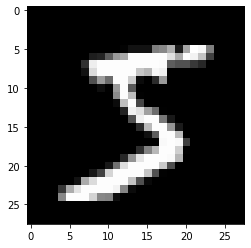

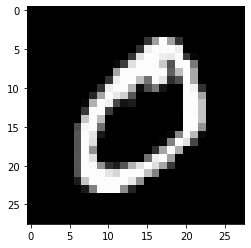

In [7]:
plt.imshow(train_images[0],cmap='gray')
plt.show()
plt.imshow(train_images[1],cmap='gray')

In [8]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Jetons un coup d'œil aux données de test:

In [9]:
print(test_images.shape)
print(len(test_labels))

(10000, 28, 28)
10000


La démarche à suivre est la suivante : nous construirons d'abord notre réseau de neurones avec les données d'entraînement, `train_images` et `train_labels`. Le réseau apprendra ensuite à associer des images et des étiquettes. Enfin, nous demanderons au réseau de produire des prédictions pour `test_images`, et nous vérifierons si ces prédictions correspondent aux étiquettes de `test_labels`.

On commence par construire notre réseau de neurones :

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28* 28,)))
network.add(layers.Dense(10, activation='softmax'))

Ici, notre réseau se compose d'une séquence de deux couches `dense`, qui sont des couches neuronales entièrement connectées (également appelées «fully-connected»). La deuxième (et dernière) couche est une couche "softmax" à 10 sorties, ce qui signifie qu'elle renverra un tableau de 10 scores de probabilité. Chaque score correspondra à la probabilité que l'image numérique actuelle appartienne à l'une de nos classes à 10 chiffres.

Pour préparer notre réseau, nous devons choisir trois autres choses, dans le cadre de l'étape de "compilation":

`Une fonction de perte`: c'est avec cette fonction que le réseau pourra mesurer la qualité d'un travail sur ses données d'entrainement, et donc comment il pourra s'orienter dans la bonne direction.

`Un optimiseur`: c'est le mécanisme par lequel le réseau se mettra à jour en fonction des données qu'il voit et de sa fonction de perte.

`Mesures à surveiller pendant l'entrainement et les tests`. Ici, nous nous intéresserons que de la précision.

In [11]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Avant l'entrainement, nous allons prétraiter nos données en la forme attendue par le réseau et en les mettant à l'échelle de sorte que toutes les valeurs soient à l'intervalle `[0, 1]`.

In [12]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
train_images=train_images.reshape((train_images.shape[0],28*28))
test_images=test_images.reshape((test_images.shape[0],28*28))

Nous devons également changer le type des étiquettes en `categorical`

In [13]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [14]:
print(train_images.shape)

(60000, 784)


Maintenant nous sommes prêts à faire l'entrainement :

In [15]:
network.fit(train_images, train_labels, epochs=4, batch_size=128)

Epoch 1/4
469/469 [==============================] - 5s 9ms/step - loss: 0.2546 - accuracy: 0.9269
Epoch 2/4
469/469 [==============================] - 4s 9ms/step - loss: 0.1033 - accuracy: 0.9702
Epoch 3/4
469/469 [==============================] - 4s 8ms/step - loss: 0.0683 - accuracy: 0.9794
Epoch 4/4
469/469 [==============================] - 4s 8ms/step - loss: 0.0496 - accuracy: 0.9851


On check maintenant la performance de notre modele dans la base de test :


In [16]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0669 - accuracy: 0.9802


In [17]:
print('test_acc:', test_acc)

test_acc: 0.9801999926567078


# Exercice 1:

1-Ajouter 1 ou 2 couches cachées au réseau de neurones utilisé et decrire comment ça affecte la précision.

2-Essayer de modifier le nombre de neurones pour chaque couche. 

3-Essayer la fonction d'activation `tanh` au lieu de `relu`.

4-Modifier l'optimiseur `rmsprop` par `sgd` et/ou `adam`

In [18]:
network = models.Sequential() 
network.add(layers.Dense(512, activation='relu', input_shape=(28* 28,)))
#network.add(layers.Dense(512, activation='relu', input_shape=(28* 28,)))
network.add(layers.Dense(512, activation='relu', input_shape=(28* 28,))) 
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network.fit(train_images, train_labels, epochs=4, batch_size=128)    
test_loss, test_acc = network.evaluate(test_images, test_labels) 
print('test_acc:', test_acc)            

Epoch 1/4
469/469 [==============================] - 6s 12ms/step - loss: 0.2220 - accuracy: 0.9316
Epoch 2/4
469/469 [==============================] - 6s 12ms/step - loss: 0.0812 - accuracy: 0.9747
Epoch 3/4
469/469 [==============================] - 7s 15ms/step - loss: 0.0537 - accuracy: 0.9830
Epoch 4/4
313/313 [==============================] - 2s 4ms/step - loss: 0.0880 - accuracy: 0.9757
test_acc: 0.9757000207901001


Réponse 1- Les couches cachées augmentent la précision du réseau de neurones car elles permettent de mieux entrainer le réseau. Cependant, si le nombre de couches cachées est trop élevé, le modèle sera capable de s'entrainer mais pas de généraliser à de nouvelles données. 

In [19]:
network = models.Sequential() 
network.add(layers.Dense(512, activation='relu', input_shape=(28* 28,)))
network.add(layers.Dense(2000, activation='relu', input_shape=(28* 28,)))
network.add(layers.Dense(4000, activation='relu', input_shape=(28* 28,))) 
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network.fit(train_images, train_labels, epochs=4, batch_size=128)    
test_loss, test_acc = network.evaluate(test_images, test_labels) 
print('test_acc:', test_acc) 

Epoch 1/4
469/469 [==============================] - 85s 178ms/step - loss: 0.2550 - accuracy: 0.9259
Epoch 2/4
469/469 [==============================] - 71s 151ms/step - loss: 0.1118 - accuracy: 0.9703
Epoch 3/4
469/469 [==============================] - 73s 155ms/step - loss: 0.0903 - accuracy: 0.9765
Epoch 4/4
313/313 [==============================] - 4s 13ms/step - loss: 0.1604 - accuracy: 0.9673
test_acc: 0.9672999978065491


Réponse 2- Lorsque le nombre de neurones augmente pour chaque couche, la précision s'améliore. Mais, si le nombre de neurones pour chaque couche est trop élevé, le réseau a une capacité de traitement de l'information si importante que la quantité limitée d'informations contenues ne suffit pas a entrainer tous les neurones des réseaux cachés. De plus, le temps de calcul est plus long et la précision n'augmente pas significativement.

In [20]:
network = models.Sequential() 
network.add(layers.Dense(512, activation='tanh', input_shape=(28* 28,)))
network.add(layers.Dense(512, activation='tanh', input_shape=(28* 28,)))
network.add(layers.Dense(512, activation='tanh', input_shape=(28* 28,))) 
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network.fit(train_images, train_labels, epochs=4, batch_size=128)    
test_loss, test_acc = network.evaluate(test_images, test_labels) 
print('test_acc:', test_acc)

Epoch 1/4
469/469 [==============================] - 7s 14ms/step - loss: 0.3295 - accuracy: 0.8991
Epoch 2/4
469/469 [==============================] - 7s 14ms/step - loss: 0.1288 - accuracy: 0.9610
Epoch 3/4
469/469 [==============================] - 7s 15ms/step - loss: 0.0852 - accuracy: 0.9737
Epoch 4/4
313/313 [==============================] - 1s 3ms/step - loss: 0.1038 - accuracy: 0.9690
test_acc: 0.968999981880188


Réponse 3- La durée d'activation avec la fonction tanh est globalement la même qu'avec la fonction relu. L'avantage de la fonction relu est d'empecher la saturation de son gradient lors de l'algorithme de descente du gradient, donc il converge plus rapidemement que la fonction tanh. De plus, cette fonction est moins couteuse que tanh (dû au calcul des exponentielles).

In [21]:
network = models.Sequential() 
network.add(layers.Dense(512, activation='relu', input_shape=(28* 28,)))
network.add(layers.Dense(512, activation='relu', input_shape=(28* 28,)))
network.add(layers.Dense(512, activation='relu', input_shape=(28* 28,))) 
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network.fit(train_images, train_labels, epochs=4, batch_size=128)    
test_loss, test_acc = network.evaluate(test_images, test_labels) 
print('test_acc:', test_acc)

Epoch 1/4
469/469 [==============================] - 6s 12ms/step - loss: 0.2113 - accuracy: 0.9367
Epoch 2/4
469/469 [==============================] - 5s 12ms/step - loss: 0.0820 - accuracy: 0.9749
Epoch 3/4
469/469 [==============================] - 5s 12ms/step - loss: 0.0552 - accuracy: 0.9825
Epoch 4/4
313/313 [==============================] - 1s 3ms/step - loss: 0.0731 - accuracy: 0.9794
test_acc: 0.9793999791145325


Réponse 4- L'algorithme sgd (méthode de descente du gradient) est plus rapide (8.2s) que les deux autres mais sa précision est dégradée (0.925). L'algorithme rmsprop (Root Mean Square propagation) est le plus lent des trois (11.9s) et la précision est de 0.978. L'algorithme adam combine les avantages de deux extensions sgd : rmsprop et adagrad. Il est donc aussi rapide que sgd et sa précision est la même que rmsprop. C'est le meilleur compromis des 3 algorithmes en terme de précision et de rapidité.

# Partie 2 : Introduction au Réseau de neurones convolutifs

Dans cette partie on va créer un reseau de neurones convolutifs pour resoudre le problème de classfication des chiffres manuscrits de la base de données MNIST. 

Les 6 lignes ci-dessous montrent l'architecture basique d'un CNN.

In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

2022-02-19 17:18:10.540454: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


On remarque que la couche de convolution reçoit comme entrée un tenseur de forme `(image_height, image_width, image_channels)`. Dans notre cas, nos images sont en niveau de gris donc `image_channels=1`. 

Affichons l'architecture de notre CNN :

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-traina

maintenant on doit ajouter notre classificateur qui est un reseau de neurones entièrement connectées 

In [3]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

Comme vous pouvez remarquer, la couche de "flatten" est entre la partie d'extraction de caracteristiques et la partie de classfication. Il s'agit de rendre le tenseur 3D en tenseur 1D.  

Prétraitement de données :

In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Commencer l'entrainement:

In [5]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history =model.fit(train_images, train_labels, epochs=4, batch_size=64)

Epoch 1/4
938/938 [==============================] - 41s 42ms/step - loss: 0.1768 - accuracy: 0.9436
Epoch 2/4
938/938 [==============================] - 46s 49ms/step - loss: 0.0459 - accuracy: 0.9858
Epoch 3/4
938/938 [==============================] - 39s 41ms/step - loss: 0.0322 - accuracy: 0.9905
Epoch 4/4
938/938 [==============================] - 40s 43ms/step - loss: 0.0247 - accuracy: 0.9922


Visualisation des courbes de précision et erreur lors de l'entrainement:

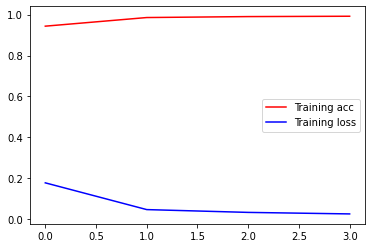

In [9]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.legend()
plt.show()

Évaluation du model dans la base de test:
    

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc',test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.0276 - accuracy: 0.9920
test_acc 0.9919999837875366


# Exercice 2:

Modifier les hyper-paramétres de CNN et commenter les résultats. 

Epoch 1/4
938/938 [==============================] - 61s 63ms/step - loss: 0.1591 - accuracy: 0.9491
Epoch 2/4
938/938 [==============================] - 61s 65ms/step - loss: 0.0434 - accuracy: 0.9868
Epoch 3/4
938/938 [==============================] - 51s 55ms/step - loss: 0.0279 - accuracy: 0.9916
Epoch 4/4
938/938 [==============================] - 58s 62ms/step - loss: 0.0207 - accuracy: 0.9939


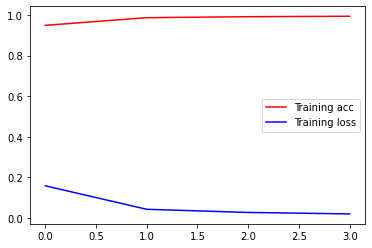

313/313 [==============================] - 3s 9ms/step - loss: 0.0293 - accuracy: 0.9930
test_acc 0.9929999709129333


In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) 
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history =model.fit(train_images, train_labels, epochs=4, batch_size=64)        
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc',test_acc)

Choix des hyperparamètres : nombre de filtres, forme du filtre et forme du MaxPooling. 
1) Nombre de filtres : pour préserver l'information il faut maintenir le nombre d'images intermédiaires croissant d'une couche à l'autre. Il faut donc que les couches en sortie aient plus d'images que les couches en entrée (dans notre cas, 32 - 64 - 128). 
2) Forme du filtre : comme notre image est de taille 28x28, il est plus approprié d'utiliser un filtre 5x5 sur la première couche. Cela améliore la précision.  
3) Forme du MaxPooling : La valeur 2x2 est un très bon choix. En essayant d'augmenter la taille on risque de perdre de l'information.

# Partie 3 : Classification d'objets


L'une des caractéristiques fondamentales de l'apprentissage profond est qu'il est capable de trouver des caractéristiques intéressantes dans les données d'entrainement, sans avoir besoin d'une ingénierie manuelle pour extraire ces caractéristiques, et cela ne peut être réalisé que lorsque de nombreux exemples d'entrainement sont disponibles.

##### Télechargement de dataset_Lab3_partie3

La base de données proposée dans cette partie est formée par 500 images divisées équitabelement sur 10 classes.  

Lire les images à partir des dossiers :

In [16]:
import os
import cv2
import numpy as np

def load_data (data_path,img_shape):
    data_dir_list = os.listdir(data_path)
    img_rows=img_shape[0]
    img_cols=img_shape[1]
    num_channel=img_shape[2]


    labels=[]
    data=[]
    len_list_img=0
    num_class=0
    for dataset in data_dir_list:
        img_list=os.listdir(data_path+'/'+ dataset)    
        for img in img_list:
            input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
            input_img=cv2.resize(input_img,(img_rows,img_cols))
            data.append(input_img)
            labels.append(num_class)
        num_class+=1

    data = np.array(data)
    data = data.astype('float32')
    data /= 255
    labels=np.array(labels)
    print('data shape',data.shape)
    print('labels shape',labels.shape)
    return data, labels

In [26]:
data_path='/Users/claramacabiau/Documents/Canada/Cours_ETS/SYS809/lab3_1/mini_Caltech101'
img_shape=[224,224,3]
data, labels=load_data (data_path,img_shape)

NotADirectoryError: [Errno 20] Not a directory: '/Users/claramacabiau/Documents/Canada/Cours_ETS/SYS809/lab3_1/mini_Caltech101//.DS_Store'

Maintenant nous avons bien lu toutes les images et donné à chacune une étiquette. 
Vous pouvez utiliser la fonction ci-desous pour afficher une image en donnant un numéro aléatoire entre 0 et 499(nombre total d'images dans la base de données).

In [24]:
def show_img (data,index):
    if index>=data.shape[0] :
        return print('index doit etre entre 0 et',data.shape[0])
    img=data[index]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)


In [25]:
show_img(data,51)

NameError: name 'data' is not defined

L'étape prochaine est la division de notre base de données en train et test. Cette étape est facile en utilisant la fonction `train_test_split` offerte par `sklearn`.  

In [34]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
num_classes=10
Y = to_categorical(labels, num_classes)
X_train,y_train = shuffle(data,Y, random_state=2)
X_train, X_test, y_train , y_test = train_test_split(X_train,y_train, test_size=0.3, random_state=2)


Définition de notre CNN: 

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
from tensorflow.keras import layers

model = Sequential()
model.add(Convolution2D(16, 3,3,input_shape=img_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 74, 74, 16)        448       
                                                                 
 activation (Activation)     (None, 74, 74, 16)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 activation_1 (Activation)   (None, 12, 12, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                  

In [36]:
# Training
n_epoch=100
hist = model.fit(X_train, y_train, batch_size=15, epochs=n_epoch, verbose=1, validation_data=(X_test, y_test))


Epoch 1/100
24/24 [==============================] - 2s 41ms/step - loss: 2.3182 - accuracy: 0.0914 - val_loss: 2.3045 - val_accuracy: 0.0867
Epoch 2/100
24/24 [==============================] - 1s 29ms/step - loss: 2.3015 - accuracy: 0.1086 - val_loss: 2.3038 - val_accuracy: 0.0867
Epoch 3/100
24/24 [==============================] - 1s 30ms/step - loss: 2.3002 - accuracy: 0.1029 - val_loss: 2.2969 - val_accuracy: 0.1200
Epoch 4/100
24/24 [==============================] - 1s 26ms/step - loss: 2.2917 - accuracy: 0.1371 - val_loss: 2.2803 - val_accuracy: 0.1800
Epoch 5/100
24/24 [==============================] - 1s 28ms/step - loss: 2.2682 - accuracy: 0.1143 - val_loss: 2.2172 - val_accuracy: 0.1867
Epoch 6/100
24/24 [==============================] - 1s 27ms/step - loss: 2.2051 - accuracy: 0.1886 - val_loss: 2.1337 - val_accuracy: 0.2000
Epoch 7/100
24/24 [==============================] - 1s 29ms/step - loss: 2.1520 - accuracy: 0.2314 - val_loss: 2.0837 - val_accuracy: 0.2267
Epoch 

On visualise maintenant les résultats obtenus :

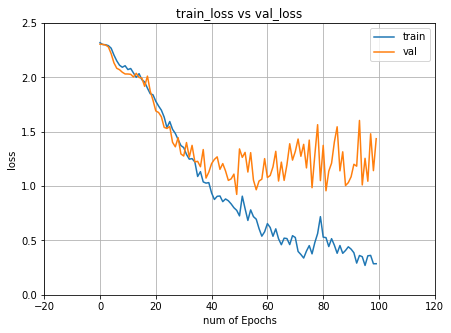

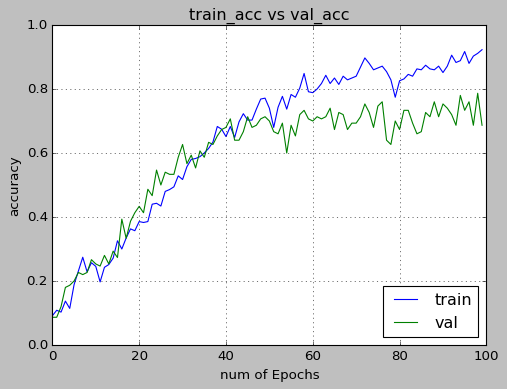

In [37]:
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(n_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
plt.style.use(['classic'])

Évaluation de notre model :

In [38]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]
print (test_image.shape)

print(model.predict(test_image))
predict_x=model.predict(test_image) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)
print(y_test[0:1])

5/5 [==============================] - 0s 15ms/step - loss: 1.4358 - accuracy: 0.6867
Test Loss: 1.435835838317871
Test accuracy: 0.6866666674613953
(1, 224, 224, 3)
[[2.0230887e-12 9.0005319e-09 4.7515218e-09 1.0621554e-08 9.9999785e-01
  1.4648097e-07 4.8029722e-07 1.4992729e-06 1.2066932e-10 1.6348774e-14]]
[4]
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Maintenant notre modèle est bien entrainé, on peut visualiser les cartes de caractéristiques pour une image de test. Les cartes de caractéristiques sont les réponses des filtres par l'opération de convolution de l'image en entrée.

In [39]:

def get_featuremaps(model, layer_idx, X_batch):
    #from keras import backend as K
    from tensorflow.python.keras import backend as K
    get_activations = K.function([model.input], [model.layers[layer_idx].output])
    activations = get_activations([X_batch])
    return activations

def show_feature_map(layer_num,filter_num,test_image):
    activations = get_featuremaps(model, int(layer_num),test_image)
    feature_maps = activations[0][0]
    fig=plt.figure(figsize=(5,5))
    plt.imshow(feature_maps[:,:,filter_num],cmap='gray')
    
def show_feature_maps(layer_num,test_image):
    activations = get_featuremaps(model, int(layer_num),test_image)
    feature_maps = activations[0][0]    
    num_of_featuremaps=feature_maps.shape[2]
    fig=plt.figure(figsize=(16,16))
    plt.title("featuremaps-layer-{}".format(layer_num))
    subplot_num=int(np.ceil(np.sqrt(num_of_featuremaps)))
    for i in range(int(num_of_featuremaps)):
        ax = fig.add_subplot(subplot_num, subplot_num, i+1)
        ax.imshow(feature_maps[:,:,i],cmap='gray')
        plt.xticks([])
        plt.yticks([])
        plt.tight_layout()
    plt.show()

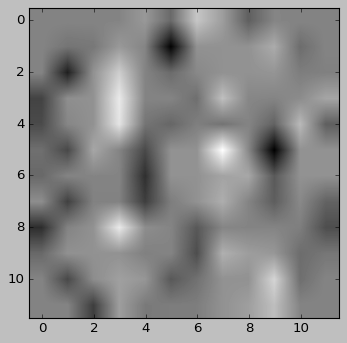

In [40]:
layer_num=3
filter_num=0
show_feature_map(layer_num,filter_num,test_image)

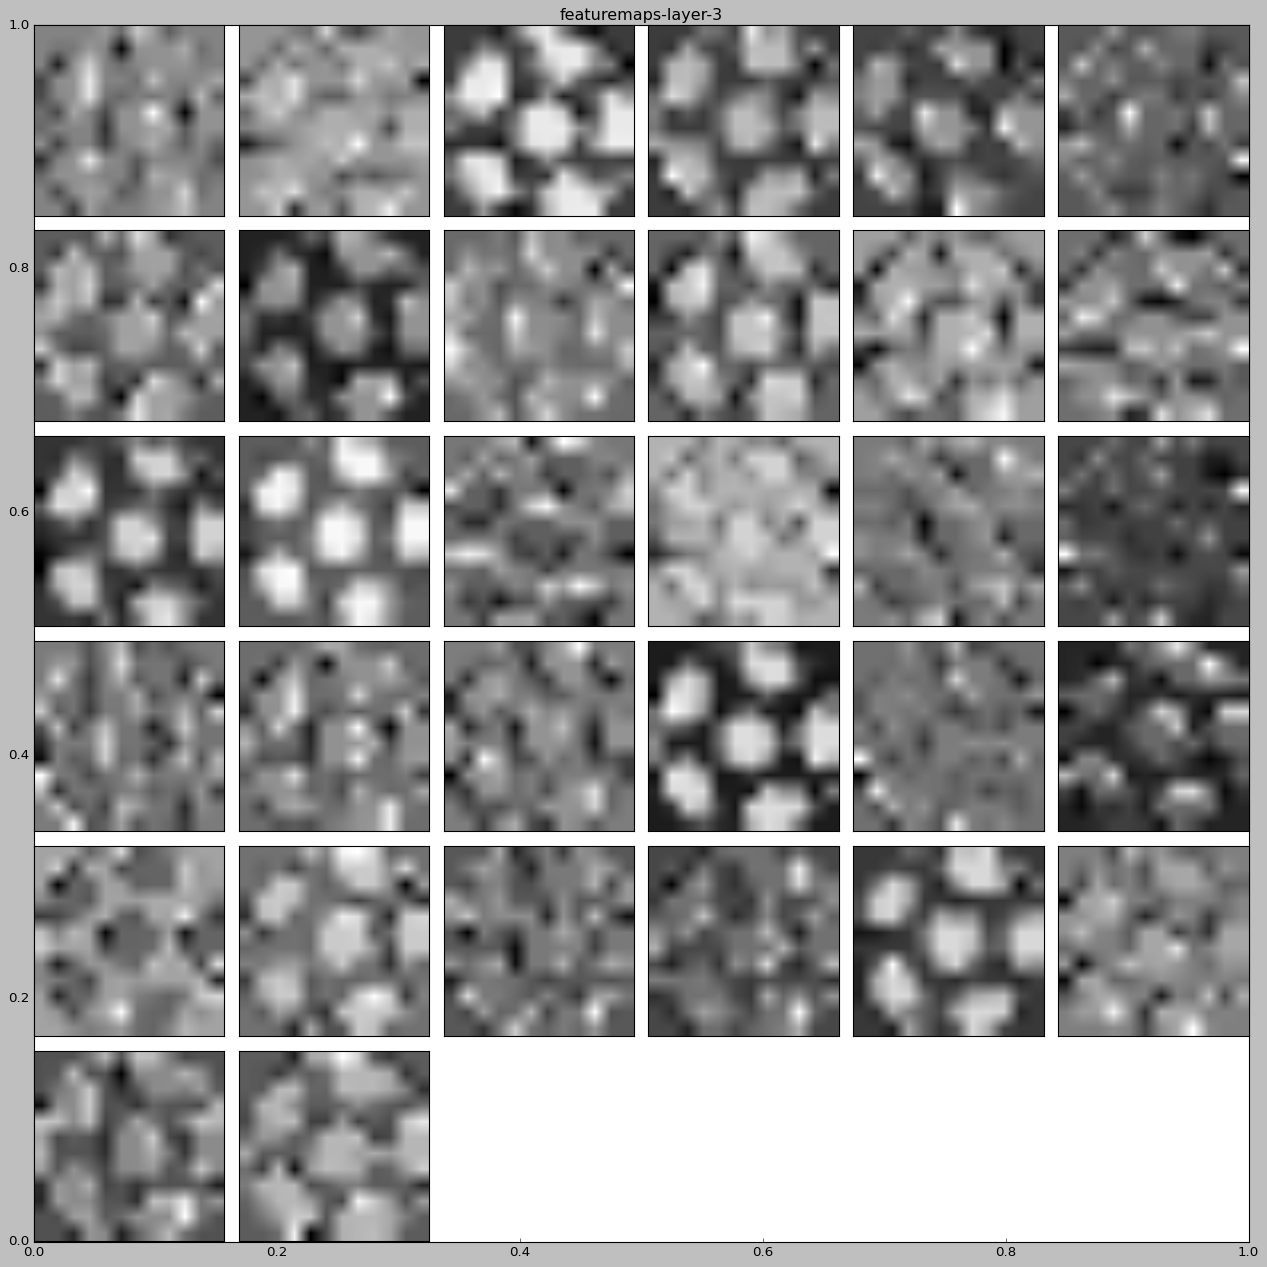

In [41]:
show_feature_maps(layer_num,test_image)

On souhaite mesurer la qualité de notre model de classification. Pour cela, on veut savoir :
* Combien d'images sont faussement estimées pour chaque classe ?
* Combien d'images sont bien classées pour chaque classe ?

La matrice de confusion est le meilleur outil ! 

In [42]:
# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [43]:

predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)


[4 8 8 3 6 0 5 8 9 3 2 9 5 9 5 3 2 4 0 5 6 5 8 3 5 3 6 1 3 9 8 0 1 0 0 2 4
 7 9 4 8 0 5 2 1 2 6 2 0 8 6 0 9 8 2 1 7 9 8 7 6 1 5 5 0 8 1 4 1 0 0 0 6 2
 8 3 3 0 1 9 3 6 4 6 4 9 8 6 6 8 8 6 1 4 0 8 0 0 8 9 9 5 4 9 5 2 8 4 8 3 6
 2 2 0 9 4 0 1 3 4 3 3 9 6 7 9 2 0 0 2 0 7 9 6 3 9 0 0 3 2 6 2 6 9 6 9 2 9
 6 0]


Confusion matrix, without normalization


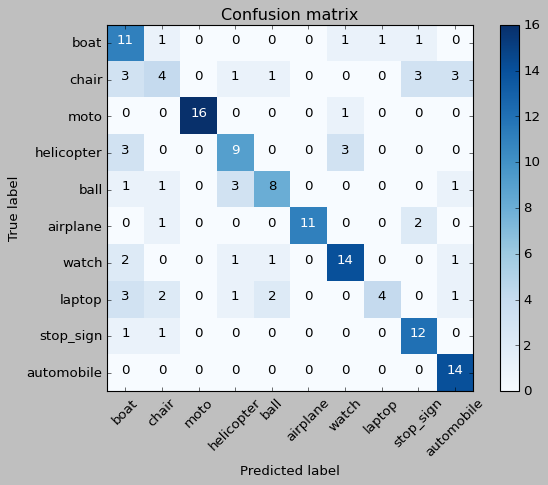

In [44]:
# Compute confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), classes_x))

np.set_printoptions(precision=2)
target_names = os.listdir(data_path)
plot_confusion_matrix(cnf_matrix,normalize=False, classes=target_names,
                      title='Confusion matrix')

# Exercice 3

# Évaluation :
### Vous devez fournir un fichier .ipynb avec les réponses aux questions.
Exercice 1 : 25%
Exercice 2 : 25%
Exercice 3 : 50%

1- Commenter les résultats obtenus dans cette partie.

2- À quoi sert les couches de dropout ?

3- Modifier les paramètres de l'optimisateur et comparer les résultats. 


1- La matrice de confusion comprend, pour chaque cellule, les éléments de la ligne i qui ont été estimés comme appartenant à ceux de la colonne j. Les éléments qui ont été bien reconnus se retrouvent donc sur la diagonale. Le système de classification est assez performant puisqu'il arrive à bien reconnaitre les objets. Certains éléments on été plus souvent mal-estimés : chaise et ordinateur, et d'autres ont été mieux estimés : moto, montre et voiture. 
On remarque de plus que la perte est plus élevée durant la validation du modèle plutôt qu'à l'entrainement et la précision est meilleure pendant l'entrainement. C'est parce que le modèle est confronté à des images nouvelles.

2- Le dropout est la désactivation temporaire de certains neurones dans le réseau. Cela permet de réduire l'overfitting lors de l'entrainement. 